Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14219055] + [[0.3225882]] *x


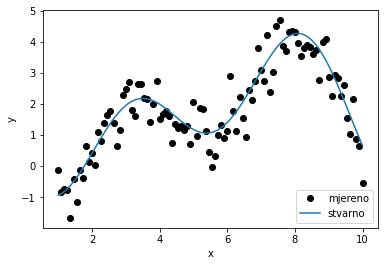

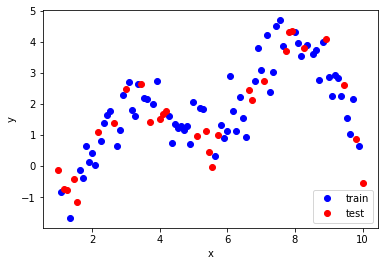

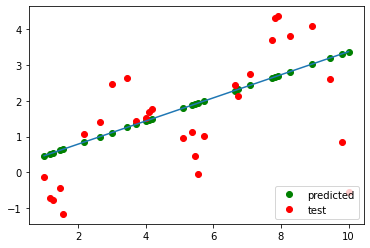

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y
def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy
x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)
plt.figure(1)
plt.plot(x,y_measured,'ok',label='mjereno')
plt.plot(x,y_true,label='stvarno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)
np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]
xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]
plt.figure(2)
plt.plot(xtrain,ytrain,'ob',label='train')
plt.plot(xtest,ytest,'or',label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)
linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)
print('Model je oblika y_hat = Theta0 + Theta1 * x')
print('y_hat = ', linearModel.intercept_, '+', linearModel.coef_, '*x')
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
plt.figure(3)
plt.plot(xtest,ytest_p,'og',label='predicted')
plt.plot(xtest,ytest,'or',label='test')
plt.legend(loc = 4)
x_pravac = np.array([1,10])
x_pravac = x_pravac[:, np.newaxis]
y_pravac = linearModel.predict(x_pravac)
plt.plot(x_pravac, y_pravac)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y


def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy

x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)
np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]
xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]
linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
x_pravac = np.array([1,10])
x_pravac = x_pravac[:, np.newaxis]
y_pravac = linearModel.predict(x_pravac)
column_ones = np.ones(len(xtrain))
column_ones = column_ones[:,np.newaxis]
x_p = np.hstack((column_ones, xtrain))
transp = np.transpose(x_p)
invert = np.linalg.inv(np.dot(transp,x_p))
theta1 = np.dot(np.dot(invert, transp),ytrain)
print(theta1)


[[0.14219055]
 [0.3225882 ]]


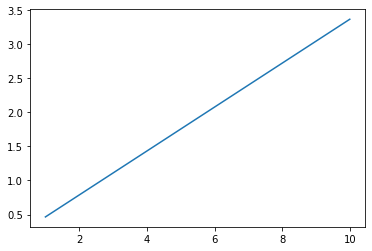

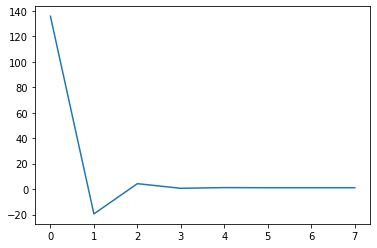

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error

def non_func(x):
	y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
	return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy

x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)

np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]
xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]
linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
x_pravac = np.array([1,10])
x_pravac = x_pravac[:, np.newaxis]
y_pravac = linearModel.predict(x_pravac)
plt.plot(x_pravac, y_pravac)
n=len(xtrain)
def pravac(x, theta0, theta1):
    return theta0 + theta1*x

alfa = 0.03
n_test=5000
theta = [0,0]
sve_udalj=[]

for i in range(0,n_test):
    sumat1=0
    sumat2=0
    udalj=0
    for j in range (0, n):
        sumat1= sumat1 + (pravac(xtrain[j], theta[0], theta[1])-ytrain[j])*xtrain[j]/len(xtrain)
        sumat2= sumat2 + (pravac(xtrain[j], theta[0], theta[1])-ytrain[j])/len(xtrain);
        udalj=udalj + (ytrain[j]-theta[0]-theta[1]*xtrain[j])  
    sve_udalj.append(udalj) 
    theta[0] =theta[0] - alfa*sumat2;    
    theta[1] =theta[1] - alfa*sumat1;
       
plt.figure(4)
plt.plot(sve_udalj[:8])


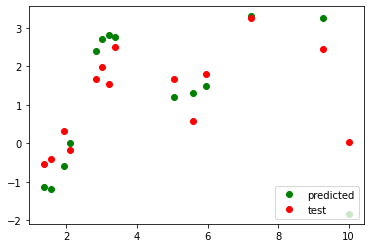

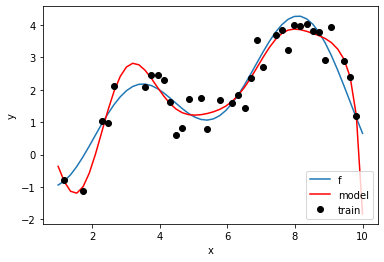

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y
def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy

x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)

np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]
xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]
xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]
linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)
#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4) 

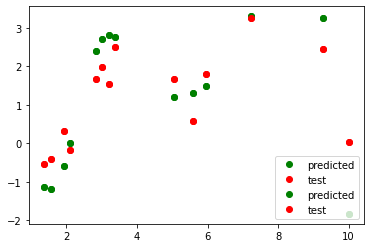

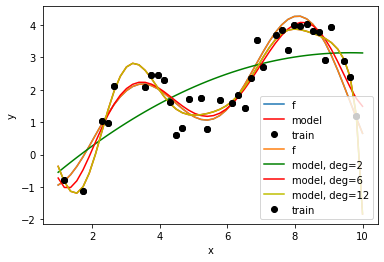

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
def non_func(x):
  y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
  return y
def add_noise(y):
  np.random.seed(14)
  varNoise = np.max(y) - np.min(y)
  y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
  return y_noisy
x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)
np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]
xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]
xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]
linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)
#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)

#degree=2
MSE_test=[]
poly2 = PolynomialFeatures(degree=2)
xnew2 = poly2.fit_transform(x)
    
np.random.seed(12)
indeksi = np.random.permutation(len(xnew2))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew2)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew2)))+1:len(xnew2)]

xtrain = xnew2[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew2[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel2 = lm.LinearRegression()
linearModel2.fit(xtrain,ytrain)

ytest_p = linearModel2.predict(xtest)
MSE_test.append(mean_squared_error(ytest, ytest_p))

#degree=6
poly6 = PolynomialFeatures(degree=6)
xnew6 = poly6.fit_transform(x)
    
np.random.seed(12)
indeksi = np.random.permutation(len(xnew6))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew6)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew6)))+1:len(xnew6)]

xtrain = xnew6[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew6[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel6 = lm.LinearRegression()
linearModel6.fit(xtrain,ytrain)

ytest_p = linearModel6.predict(xtest)
MSE_test.append(mean_squared_error(ytest, ytest_p))

#degree=12
poly12 = PolynomialFeatures(degree=15)
xnew12 = poly12.fit_transform(x)
    
np.random.seed(12)
indeksi = np.random.permutation(len(xnew12))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew12)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew12)))+1:len(xnew12)]

xtrain = xnew12[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew12[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel12 = lm.LinearRegression()
linearModel12.fit(xtrain,ytrain)

ytest_p = linearModel12.predict(xtest)
MSE_test.append(mean_squared_error(ytest, ytest_p))

#degree = 15
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)

np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]

xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

ytest_p = linearModel.predict(xtest)
MSE_test.append(mean_squared_error(ytest, ytest_p))

plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)

plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel2.predict(xnew2),'g-',label='model, deg=2')
plt.plot(x, linearModel6.predict(xnew6),'r-',label='model, deg=6')
plt.plot(x, linearModel12.predict(xnew12),'y-',label='model, deg=12')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)


[1.2745083887453057, 0.31157034291242314, 0.686262720339181, 0.686262720339181, 0.2928986405388566]
Koeficijenti modela iznad:  [-1.44835005] , [[ 0.          0.95265659 -0.04945171]]
Koeficijenti modela dobivenog ridge regresijom iznose:  [-1.28221939] , [[ 0.00000000e+00 -6.91703156e-02 -9.64029713e-02 -2.54846512e-02
   1.25873620e-01  1.54255368e-01 -9.01383490e-02 -1.40031650e-02
   1.85766473e-02 -4.78368236e-03  4.14727116e-04  3.62659755e-05
  -1.19678899e-05  1.18210694e-06 -5.51878796e-08  1.03127934e-09]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.30104e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


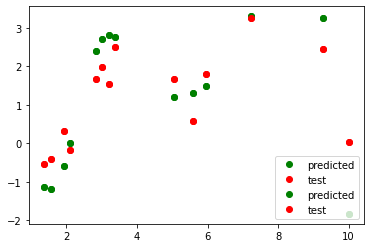

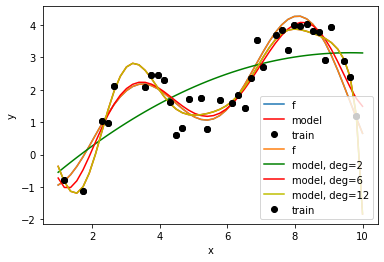

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
def non_func(x):
  y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
  return y
def add_noise(y):
  np.random.seed(14)
  varNoise = np.max(y) - np.min(y)
  y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
  return y_noisy
x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)
np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]
xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]
xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]
linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)
#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)

#degree=2
MSE_test=[]
poly2 = PolynomialFeatures(degree=2)
xnew2 = poly2.fit_transform(x)
    
np.random.seed(12)
indeksi = np.random.permutation(len(xnew2))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew2)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew2)))+1:len(xnew2)]

xtrain = xnew2[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew2[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel2 = lm.LinearRegression()
linearModel2.fit(xtrain,ytrain)

ytest_p = linearModel2.predict(xtest)
MSE_test.append(mean_squared_error(ytest, ytest_p))

#degree=6
poly6 = PolynomialFeatures(degree=6)
xnew6 = poly6.fit_transform(x)
    
np.random.seed(12)
indeksi = np.random.permutation(len(xnew6))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew6)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew6)))+1:len(xnew6)]

xtrain = xnew6[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew6[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel6 = lm.LinearRegression()
linearModel6.fit(xtrain,ytrain)

ytest_p = linearModel6.predict(xtest)
MSE_test.append(mean_squared_error(ytest, ytest_p))

#degree=12
poly12 = PolynomialFeatures(degree=15)
xnew12 = poly12.fit_transform(x)
    
np.random.seed(12)
indeksi = np.random.permutation(len(xnew12))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew12)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew12)))+1:len(xnew12)]

xtrain = xnew12[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew12[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel12 = lm.LinearRegression()
linearModel12.fit(xtrain,ytrain)

ytest_p = linearModel12.predict(xtest)
MSE_test.append(mean_squared_error(ytest, ytest_p))

#degree = 15
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)

np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]

xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

ytest_p = linearModel.predict(xtest)
MSE_test.append(mean_squared_error(ytest, ytest_p))

plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)

plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel2.predict(xnew2),'g-',label='model, deg=2')
plt.plot(x, linearModel6.predict(xnew6),'r-',label='model, deg=6')
plt.plot(x, linearModel12.predict(xnew12),'y-',label='model, deg=12')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)

polyr = PolynomialFeatures(degree=15)
xnewr = polyr.fit_transform(x)
    
np.random.seed(12)
indeksi = np.random.permutation(len(xnewr))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnewr)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnewr)))+1:len(xnewr)]

xtrain = xnewr[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnewr[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModelr = lm.Ridge()  
linearModelr.fit(xtrain,ytrain)

ytest_p = linearModelr.predict(xtest)
MSE_test.append(mean_squared_error(ytest, ytest_p))


print(MSE_test)

print ('Koeficijenti modela iznad: ',linearModel2.intercept_,',',linearModel2.coef_)
print ('Koeficijenti modela dobivenog ridge regresijom iznose: ',linearModelr.intercept_,',',linearModelr.coef_)
